In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [4]:
data = pd.read_csv('employee_survey.csv')     #show the data

In [6]:
data.describe()

,EmpID,Age,Experience,WLB,WorkEnv,PhysicalActivityHours,Workload,Stress,SleepHours,CommuteDistance,NumCompanies,TeamSize,NumReports,TrainingHoursPerYear,JobSatisfaction
count,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000
mean,1513.000000,35.741818,9.082645,3.061157,3.029091,2.029620,2.966612,1.736529,7.005983,13.473719,4.253554,16.516033,2.383140,37.301653,3.386777
std,873.386608,10.191833,7.073344,1.447001,1.415317,0.966014,1.401486,1.064242,1.002652,8.395249,3.382501,6.638419,3.058131,13.569772,1.260599
min,1.000000,22.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000,5.000000,0.000000,10.000000,1.000000
25%,757.000000,27.000000,3.000000,2.000000,2.000000,1.300000,2.000000,1.000000,6.300000,6.000000,1.000000,11.000000,0.000000,23.500000,3.000000
50%,1513.000000,34.000000,8.000000,3.000000,3.000000,2.000000,3.000000,1.000000,7.000000,13.000000,4.000000,16.000000,0.000000,40.000000,4.000000
75%,2269.000000,43.000000,14.000000,4.000000,4.000000,2.700000,4.000000,2.000000,7.700000,21.000000,7.000000,22.000000,5.000000,46.500000,4.000000
max,3025.000000,60.000000,29.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,29.000000,12.000000,30.000000,9.000000,64.500000,5.000000


In [8]:
data.describe(include='all')      #to include categorical variables as well

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
count,3025.000000,3025,3025.000000,3025,3025,3025.000000,3025,3025,3025.000000,3025.000000,...,3025.000000,3025,3025.000000,3025.000000,3025.000000,3025.000000,3025,3025,3025.000000,3025.000000
unique,NaN,3,NaN,4,5,NaN,8,3,NaN,NaN,...,NaN,5,NaN,NaN,NaN,NaN,4,2,NaN,NaN
top,NaN,Male,NaN,Single,Senior,NaN,IT,Full-Time,NaN,NaN,...,NaN,Car,NaN,NaN,NaN,NaN,Bachelor,False,NaN,NaN
freq,NaN,1528,NaN,1437,1069,NaN,774,2077,NaN,NaN,...,NaN,1087,NaN,NaN,NaN,NaN,2300,2089,NaN,NaN
mean,1513.000000,NaN,35.741818,NaN,NaN,9.082645,NaN,NaN,3.061157,3.029091,...,7.005983,NaN,13.473719,4.253554,16.516033,2.383140,NaN,NaN,37.301653,3.386777
std,873.386608,NaN,10.191833,NaN,NaN,7.073344,NaN,NaN,1.447001,1.415317,...,1.002652,NaN,8.395249,3.382501,6.638419,3.058131,NaN,NaN,13.569772,1.260599
min,1.000000,NaN,22.000000,NaN,NaN,0.000000,NaN,NaN,1.000000,1.000000,...,4.000000,NaN,1.000000,0.000000,5.000000,0.000000,NaN,NaN,10.000000,1.000000
25%,757.000000,NaN,27.000000,NaN,NaN,3.000000,NaN,NaN,2.000000,2.000000,...,6.300000,NaN,6.000000,1.000000,11.000000,0.000000,NaN,NaN,23.500000,3.000000
50%,1513.000000,NaN,34.000000,NaN,NaN,8.000000,NaN,NaN,3.000000,3.000000,...,7.000000,NaN,13.000000,4.000000,16.000000,0.000000,NaN,NaN,40.000000,4.000000
75%,2269.000000,NaN,43.000000,NaN,NaN,14.000000,NaN,NaN,4.000000,4.000000,...,7.700000,NaN,21.000000,7.000000,22.000000,5.000000,NaN,NaN,46.500000,4.000000


In [10]:
# to check for missing data
data.isnull()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3021,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3022,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3023,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#True stands for missing value, while false stands for an available one.
#to check for null observations
data.isnull().sum()

EmpID                    0
Gender                   0
Age                      0
MaritalStatus            0
JobLevel                 0
Experience               0
Dept                     0
EmpType                  0
WLB                      0
WorkEnv                  0
PhysicalActivityHours    0
Workload                 0
Stress                   0
SleepHours               0
CommuteMode              0
CommuteDistance          0
NumCompanies             0
TeamSize                 0
NumReports               0
EduLevel                 0
haveOT                   0
TrainingHoursPerYear     0
JobSatisfaction          0
dtype: int64

In [14]:
#no missing values, all are 0.

In [16]:
#Remove employee ID because the value is not meaningful.
data = data.drop(columns=['EmpID'])

In [18]:
data.describe(include='all') 

,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,PhysicalActivityHours,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
count,3025,3025.000000,3025,3025,3025.000000,3025,3025,3025.000000,3025.000000,3025.000000,...,3025.000000,3025,3025.000000,3025.000000,3025.000000,3025.000000,3025,3025,3025.000000,3025.000000
unique,3,NaN,4,5,NaN,8,3,NaN,NaN,NaN,...,NaN,5,NaN,NaN,NaN,NaN,4,2,NaN,NaN
top,Male,NaN,Single,Senior,NaN,IT,Full-Time,NaN,NaN,NaN,...,NaN,Car,NaN,NaN,NaN,NaN,Bachelor,False,NaN,NaN
freq,1528,NaN,1437,1069,NaN,774,2077,NaN,NaN,NaN,...,NaN,1087,NaN,NaN,NaN,NaN,2300,2089,NaN,NaN
mean,NaN,35.741818,NaN,NaN,9.082645,NaN,NaN,3.061157,3.029091,2.029620,...,7.005983,NaN,13.473719,4.253554,16.516033,2.383140,NaN,NaN,37.301653,3.386777
std,NaN,10.191833,NaN,NaN,7.073344,NaN,NaN,1.447001,1.415317,0.966014,...,1.002652,NaN,8.395249,3.382501,6.638419,3.058131,NaN,NaN,13.569772,1.260599
min,NaN,22.000000,NaN,NaN,0.000000,NaN,NaN,1.000000,1.000000,0.000000,...,4.000000,NaN,1.000000,0.000000,5.000000,0.000000,NaN,NaN,10.000000,1.000000
25%,NaN,27.000000,NaN,NaN,3.000000,NaN,NaN,2.000000,2.000000,1.300000,...,6.300000,NaN,6.000000,1.000000,11.000000,0.000000,NaN,NaN,23.500000,3.000000
50%,NaN,34.000000,NaN,NaN,8.000000,NaN,NaN,3.000000,3.000000,2.000000,...,7.000000,NaN,13.000000,4.000000,16.000000,0.000000,NaN,NaN,40.000000,4.000000
75%,NaN,43.000000,NaN,NaN,14.000000,NaN,NaN,4.000000,4.000000,2.700000,...,7.700000,NaN,21.000000,7.000000,22.000000,5.000000,NaN,NaN,46.500000,4.000000


In [22]:
#I would like to check if there is even a correlation between the continuous variables and Work satisfaction.

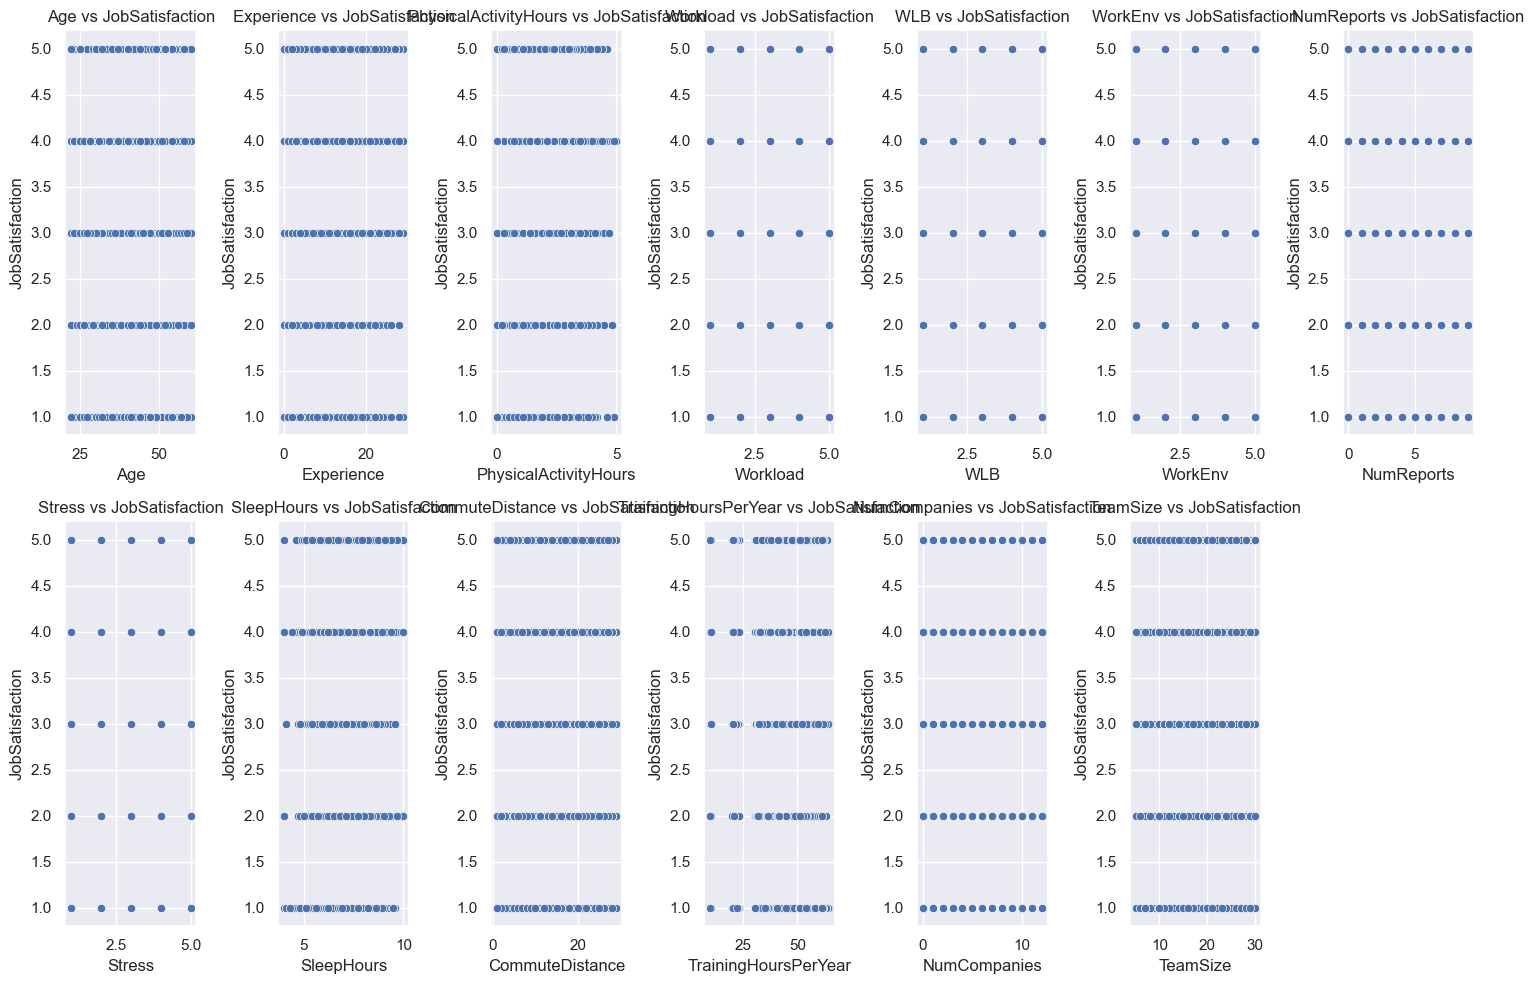

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables
continuous_vars = [
    'Age', 'Experience', 'PhysicalActivityHours', 'Workload','WLB','WorkEnv','NumReports',
    'Stress', 'SleepHours', 'CommuteDistance', 'TrainingHoursPerYear','NumCompanies','TeamSize'
]

# Setting up the plot grid
num_vars = len(continuous_vars)
fig, axes = plt.subplots(nrows=2, ncols=(num_vars + 1) // 2, figsize=(15, 10))
axes = axes.flatten()

# Scatterplots to visualize linearity
for i, var in enumerate(continuous_vars):
    sns.scatterplot(x=data[var], y=data['JobSatisfaction'], ax=axes[i])
    axes[i].set_title(f'{var} vs JobSatisfaction')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('JobSatisfaction')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [26]:
# Calculate correlation coefficients between continuous variables and JobSatisfaction
correlations = data[continuous_vars + ['JobSatisfaction']].corr()

# Extract correlations with JobSatisfaction and sort them
job_satisfaction_corr = correlations['JobSatisfaction'].drop('JobSatisfaction').sort_values(ascending=False)
job_satisfaction_corr

WLB                      0.259687
WorkEnv                  0.248730
SleepHours               0.179872
TeamSize                 0.002341
CommuteDistance          0.000773
NumCompanies            -0.003929
TrainingHoursPerYear    -0.005605
Age                     -0.006433
PhysicalActivityHours   -0.011149
Experience              -0.011893
NumReports              -0.020611
Stress                  -0.214383
Workload                -0.253426
Name: JobSatisfaction, dtype: float64

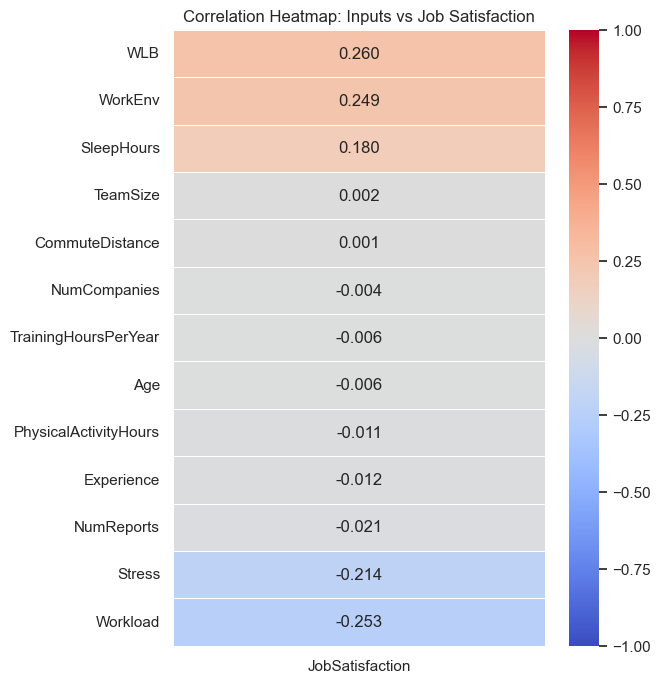

In [28]:
#To create a corration heatmap.

correlations = {
    "WLB": 0.259687,
    "WorkEnv": 0.248730,
    "SleepHours": 0.179872,
    "TeamSize": 0.002341,
    "CommuteDistance": 0.000773,
    "NumCompanies": -0.003929,
    "TrainingHoursPerYear": -0.005605,
    "Age": -0.006433,
    "PhysicalActivityHours": -0.011149,
    "Experience": -0.011893,
    "NumReports": -0.020611,
    "Stress": -0.214383,
    "Workload": -0.253426
}

# Convert to DataFrame
df_corr = pd.DataFrame.from_dict(correlations, orient='index', columns=["JobSatisfaction"])

# Plot heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Inputs vs Job Satisfaction")
plt.show()


In [34]:
#From the above, we can see that only WLB, WorkEnv, Sleephours, Stress, and Workload have the highest correlations with JobSatisfaction. 
#I will run a regression analysis using these continuous variables, but first, I want to check for multicollinearity.

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor     #VIF
variables = data[['WLB','WorkEnv','SleepHours','Stress','Workload']]
vif = pd.DataFrame()

In [38]:
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"]= variables.columns

In [40]:
vif

,VIF,features
0,5.095665,WLB
1,5.144857,WorkEnv
2,12.985119,SleepHours
3,3.531153,Stress
4,5.151800,Workload


In [44]:
# Remove continuous variables with super low correlations with Jobsatisfaction, and the variable with a VIF > 10.
copy_data = data.drop(columns=['CommuteDistance','NumCompanies','TrainingHoursPerYear','TeamSize','NumReports','Age','PhysicalActivityHours','Experience','SleepHours'])
copy_data

,Gender,MaritalStatus,JobLevel,Dept,EmpType,WLB,WorkEnv,Workload,Stress,CommuteMode,EduLevel,haveOT,JobSatisfaction
0,Male,Married,Mid,IT,Full-Time,1,1,2,1,Car,Bachelor,True,5
1,Female,Married,Mid,Finance,Full-Time,1,1,2,2,Car,Bachelor,False,5
2,Female,Single,Intern/Fresher,Marketing,Full-Time,2,4,5,4,Motorbike,Bachelor,True,5
3,Female,Married,Junior,IT,Contract,2,2,3,1,Public Transport,Bachelor,True,5
4,Other,Single,Junior,Sales,Part-Time,3,1,2,1,Car,Bachelor,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,Male,Married,Lead,Marketing,Part-Time,1,3,4,3,Public Transport,Master,False,1
3021,Female,Married,Lead,IT,Contract,3,1,2,1,Car,Master,True,1
3022,Male,Married,Lead,IT,Full-Time,1,1,1,1,Public Transport,Master,True,1
3023,Female,Married,Lead,IT,Full-Time,1,5,3,3,Public Transport,Master,True,1


In [42]:
#It is common for data science to only accept a vif below 10, so I will remove SleepHours.

In [54]:
#Now I will create dummy variables with the categorical inputs.

In [48]:
data_with_dummies = pd.get_dummies(copy_data,drop_first=True)
data_with_dummies.head()

,WLB,WorkEnv,Workload,Stress,haveOT,JobSatisfaction,Gender_Male,Gender_Other,MaritalStatus_Married,MaritalStatus_Single,...,Dept_Sales,EmpType_Full-Time,EmpType_Part-Time,CommuteMode_Car,CommuteMode_Motorbike,CommuteMode_Public Transport,CommuteMode_Walk,EduLevel_High School,EduLevel_Master,EduLevel_PhD
0,1,1,2,1,True,5,True,False,True,False,...,False,True,False,True,False,False,False,False,False,False
1,1,1,2,2,False,5,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False
2,2,4,5,4,True,5,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False
3,2,2,3,1,True,5,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,3,1,2,1,False,5,False,True,False,True,...,True,False,True,True,False,False,False,False,False,False


In [50]:
data_with_dummies.columns.values

array(['WLB', 'WorkEnv', 'Workload', 'Stress', 'haveOT',
       'JobSatisfaction', 'Gender_Male', 'Gender_Other',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'JobLevel_Junior', 'JobLevel_Lead',
       'JobLevel_Mid', 'JobLevel_Senior', 'Dept_Finance', 'Dept_HR',
       'Dept_IT', 'Dept_Legal', 'Dept_Marketing', 'Dept_Operations',
       'Dept_Sales', 'EmpType_Full-Time', 'EmpType_Part-Time',
       'CommuteMode_Car', 'CommuteMode_Motorbike',
       'CommuteMode_Public Transport', 'CommuteMode_Walk',
       'EduLevel_High School', 'EduLevel_Master', 'EduLevel_PhD'],
      dtype=object)

In [84]:

# Define target variable
y = data_with_dummies["JobSatisfaction"]

# Define feature matrix (X) AFTER encoding categorical variables
X = data_with_dummies.drop(columns=["JobSatisfaction"])  # Remove target from features

# Print shape of X and y to verify
print(X.shape, y.shape)


(3025, 30) (3025,)


In [86]:
#Standardise the data. It is not usually advised to standardise dummy variables but in ML, it is done. 
#This is because scaling has no effect on the predictive power of the dummy variables.

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [94]:
scaler.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [98]:
inputs_scaled = scaler.transform(X)

In [100]:
#Now we will split out data into training and testing.

In [108]:
from sklearn.model_selection import train_test_split

# Define the target variable (Job Satisfaction)
y = data_with_dummies["JobSatisfaction"]  

# Ensure that 'inputs_scaled' is defined correctly
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, y, test_size=0.2, random_state=365)


In [110]:
#Create the regression

In [112]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [114]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [116]:
y_hat = reg.predict(x_train)

In [120]:
reg.score(x_train,y_train)       #Calculate r squared

0.2847040348082063

In [122]:
reg.intercept_                   #yintercept or bias

3.375766878639696

In [124]:
reg.coef_

array([ 0.31764282,  0.32278948, -0.31310455, -0.2612464 , -0.22166806,
        0.01516022, -0.01144971, -0.0928711 , -0.00374166,  0.01310542,
        0.02652214,  0.02743934,  0.01744461,  0.03271593,  0.04245387,
        0.00908039,  0.08884524,  0.00676828,  0.00705124,  0.01974744,
        0.03732779,  0.04414276,  0.01369167,  0.0256144 ,  0.0215745 ,
       -0.01269457,  0.01657601,  0.01257803,  0.13897293, -0.05731152])

In [128]:
#Since these are hard to read this way, it is better to create a table.
reg_summary = pd.DataFrame(X.columns.values,columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,WLB,0.317643
1,WorkEnv,0.322789
2,Workload,-0.313105
3,Stress,-0.261246
4,haveOT,-0.221668
5,Gender_Male,0.015160
6,Gender_Other,-0.011450
7,MaritalStatus_Married,-0.092871
8,MaritalStatus_Single,-0.003742
9,MaritalStatus_Widowed,0.013105


In [177]:
#To download data as Excel file

# Create DataFrame
weights_df = pd.DataFrame({
    "Features": ["WLB", "WorkEnv", "Workload", "Stress", "haveOT", "Gender_Male", "Gender_Other",
                 "MaritalStatus_Married", "MaritalStatus_Single", "MaritalStatus_Widowed",
                 "JobLevel_Junior", "JobLevel_Lead", "JobLevel_Mid", "JobLevel_Senior",
                 "Dept_Finance", "Dept_HR", "Dept_IT", "Dept_Legal", "Dept_Marketing",
                 "Dept_Operations", "Dept_Sales", "EmpType_Full-Time", "EmpType_Part-Time",
                 "CommuteMode_Car", "CommuteMode_Motorbike", "CommuteMode_Public Transport",
                 "CommuteMode_Walk", "EduLevel_High School", "EduLevel_Master", "EduLevel_PhD"],
    "Weights": [0.317643, 0.322789, -0.313105, -0.261246, -0.221668, 0.015160, -0.011450,
                -0.092871, -0.003742, 0.013105, 0.026522, 0.027439, 0.017445, 0.032716,
                0.042454, 0.009080, 0.088845, 0.006768, 0.007051, 0.019747, 0.037328,
                0.044143, 0.013692, 0.025614, 0.021575, -0.012695, 0.016576, 0.012578,
                0.138973, -0.057312]
})


# Save as CSV
weights_df.to_csv("regression_weights.csv", index=False)
print("File saved as 'regression_weights.csv'")


File saved as 'regression_weights.csv'


In [140]:
#To test model's accuracy
reg.score(x_train,y_train)

0.2847040348082063

The biggest predictors of Job Satisfaction which explain at least 5% of the variance are:
1   WLB  	    0.317643
2	WorkEnv 	0.322789
3	Workload    -0.313105
4	Stress	    -0.261246

Also, our model has an r squared of 28%, meaning that the variance explained in Job Satisfaction is only 28%. This suggests that important predictors might be missing, or the relationship is more complex than a simple linear model can capture. 

In [143]:
#Test the model

In [145]:
y_hat_test = reg.predict(x_test)

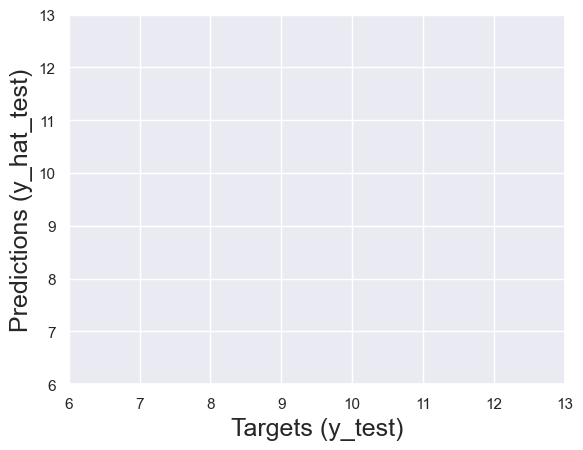

In [147]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

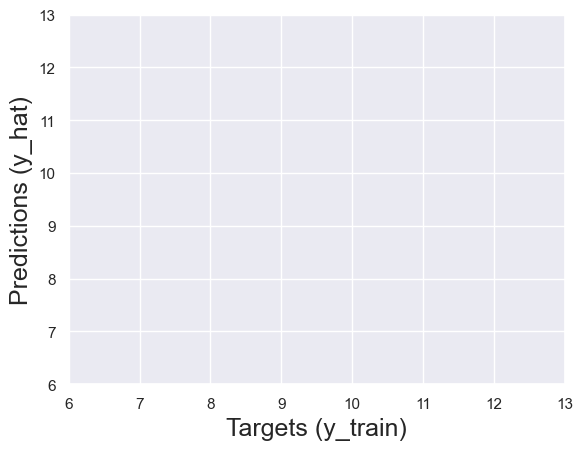

In [149]:
plt.scatter(y_train,y_hat,alpha=0.2)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [151]:
# I am not sure why the tables are empty...

In [153]:
#To find out how good these predictions are.

In [155]:
df_pf = pd.DataFrame(y_hat_test,columns=['Predictions'])
df_pf.head()

,Predictions
0,3.162023
1,3.182372
2,3.374408
3,3.746290
4,4.197745


In [157]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    3
1    4
2    5
3    5
4    5
Name: JobSatisfaction, dtype: int64

In [159]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,3.162023,20.085537
1,3.182372,54.598150
2,3.374408,148.413159
3,3.746290,148.413159
4,4.197745,148.413159
...,...,...
600,3.820127,20.085537
601,2.938599,20.085537
602,2.341212,20.085537
603,4.578158,54.598150


In [161]:
df_pf['Residual']= df_pf['Target']-df_pf['Predictions']

In [163]:
df_pf['Difference%']= np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference%
0,3.162023,20.085537,16.923513,84.257212
1,3.182372,54.598150,51.415778,94.171283
2,3.374408,148.413159,145.038751,97.726342
3,3.746290,148.413159,144.666869,97.475770
4,4.197745,148.413159,144.215414,97.171582
...,...,...,...,...
600,3.820127,20.085537,16.265410,80.980706
601,2.938599,20.085537,17.146938,85.369579
602,2.341212,20.085537,17.744325,88.343790
603,4.578158,54.598150,50.019992,91.614812


In [165]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,605.000000,605.000000,605.000000,605.000000
mean,3.389578,55.068172,51.678594,78.501300
std,0.684940,49.211549,48.956163,28.797131
min,1.532748,2.718282,-0.667949,0.017708
25%,2.888616,20.085537,16.265410,80.980706
50%,3.420410,54.598150,50.671065,92.807292
75%,3.863595,54.598150,51.469001,94.268764
max,5.191983,148.413159,146.589908,98.771503


The minimum difference between prediction and target is 1.7%. The max is 98%. If we look at the percentiles, the difference between prediction and targets are quite high. This is not a good model.

In [168]:
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
452,2.718763,2.718282,-0.000481,0.017708
420,2.719465,2.718282,-0.001183,0.043536
34,2.698242,2.718282,0.020039,0.737209
239,2.688494,2.718282,0.029788,1.095844
139,2.686600,2.718282,0.031682,1.165523
...,...,...,...,...
489,2.507833,148.413159,145.905327,98.310236
40,2.393186,148.413159,146.019973,98.387484
123,2.128991,148.413159,146.284169,98.565497
284,2.015577,148.413159,146.397582,98.641915


In [170]:
#to show all rows

In [172]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format',lambda x: '%.2f' %x)
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
452,2.72,2.72,-0.00,0.02
420,2.72,2.72,-0.00,0.04
34,2.70,2.72,0.02,0.74
239,2.69,2.72,0.03,1.10
139,2.69,2.72,0.03,1.17
159,2.68,2.72,0.04,1.40
155,2.67,2.72,0.05,1.71
557,2.78,2.72,-0.06,2.09
291,2.78,2.72,-0.06,2.17
151,2.66,2.72,0.06,2.25


In [174]:
# R squared of the testing model
reg.score(x_test,y_test)       

0.23098474760126464

#The r squared for the testing model is even worse now at 23%. This is not a good model fit. We are missing variables that would explain more of the variance in Job Satisfaction. Perhaps the survey did not accurately measure job satisfaction. A better survey design is needed, and confirmatory factor analysis should be done to ensure good construct validity.
